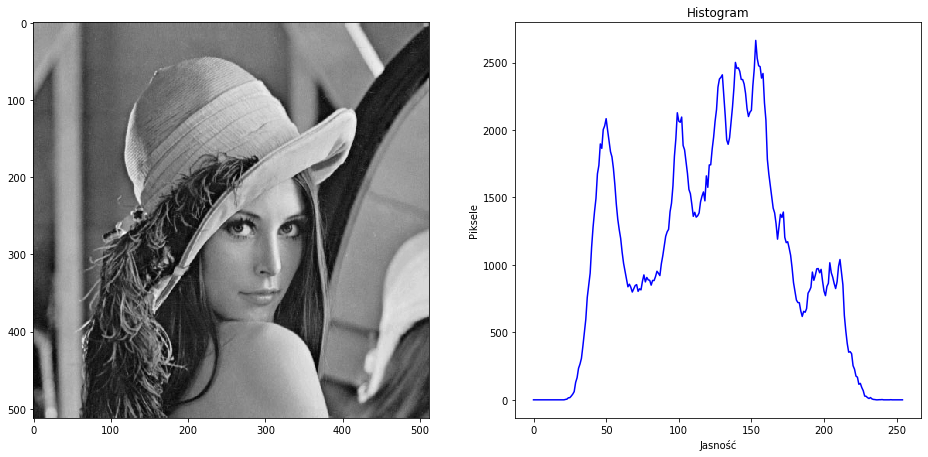

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))
plt.subplot(2,2,1)

img = Image.open("lenargb.jpg").convert("L")
arr = np.asarray(img)
plt.imshow(arr, cmap = "gray")
plt.plot()

plt.subplot(2,2,2)
plt.title("Histogram")
plt.ylabel('Piksele')
plt.xlabel('Jasność')
h = np.histogram(img, list(range(256)))[0]
plt.plot(h, 'blue')

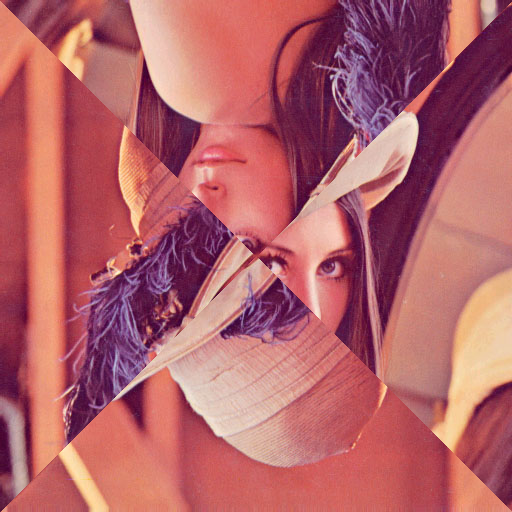

In [23]:
from PIL import Image, ImageDraw
from IPython.display import display
import random

img = Image.open('lenargb.jpg')

mirror = img.transpose(Image.ROTATE_180)
sz = max(img.size + mirror.size)
result = Image.new(img.mode, (sz, sz))
result.paste(img, (0, 0) + img.size)
mask = Image.new('1', mirror.size)
draw = ImageDraw.Draw(mask)

rnd = random.randint(0, 1)

if rnd == 0:
    draw.polygon([sz/2, sz/2, 0, sz, sz, sz], outline = 'white', fill = 'white')
    draw.polygon([0, 0, sz/2, sz/2, sz, 0], outline = 'white', fill = 'white')
else:
    draw.polygon([sz/2, sz/2, 0, sz, 0, 0], outline = 'white', fill = 'white')
    draw.polygon([sz, sz, sz/2, sz/2, sz, 0], outline = 'white', fill = 'white')

result.paste(mirror, (0, 0) + mirror.size, mask)

del mirror, mask, draw
display(result)

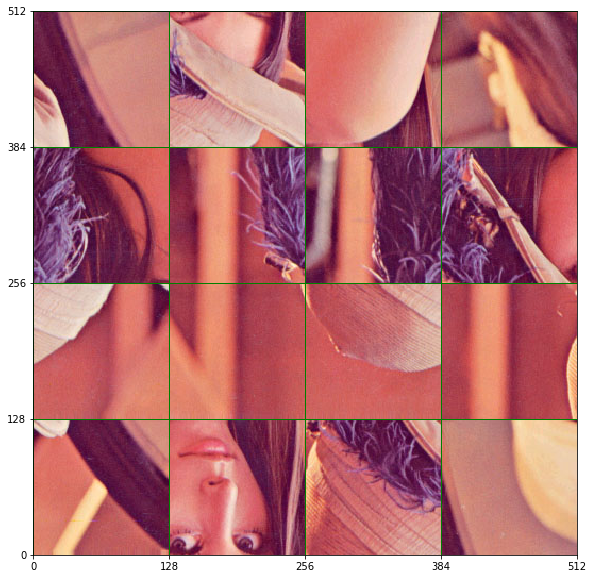

In [26]:
from IPython.display import display
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ilość kwadratów na bok
ilbok=4

img = Image.open('lenargb.jpg').convert('RGBX')

x=img.width
y=img.height

if x<y:
    img=img.crop((0,0,x,x))
elif x>y:
    img=img.crop((0,0,y,y))    

width, height = img.size

X = int(width/ilbok)
img=img.crop((0,0,ilbok*X,ilbok*X))

tiles = [(xb*X, yb*X, (xb+1)*X, (yb+1)*X)
for xb in range(int(ilbok)) for yb in range(int(ilbok))]

shuffle = list(tiles)
random.Random().shuffle(shuffle)
result = Image.new(img.mode, (width, height))
for box, sbox in zip(tiles, shuffle):
    c = img.crop(sbox)
    result.paste(c, box)

plt.figure(figsize=(10,10))
plt.axis([0, 512, 0, 512])
plt.xticks([0,128,256,384,512])
plt.yticks([0,128,256,384,512])
plt.grid(linestyle='-', linewidth='1', color='green')
plt.imshow(result)